# CNN Deep Learning Model

In [1]:
path_input = r"D:/Capstone Project/Data ready to import into DL model/"
path_output = r"D:/Capstone Project/Outputs DL model/multiclass approach/v5/"

# Load the X and y arrays (Images and Labels, respectively)
# The X array is already normalised and the y array is encoded into OneHotEncoder.

import numpy as np

X = np.load(path_input+"X.npy")
y = np.load(path_input+"multiclass approach/y.npy")

In [2]:
print("X shape:",np.shape(X))
print("y shape:",np.shape(y))

X shape: (13524, 250, 250)
y shape: (13524, 4)


## Train-validation-test split

In [3]:
from sklearn.model_selection import train_test_split

# Split the data into training and validation
# Train: 80%
# Validation: 10%
# Test: 10%

X_train, X_preval, y_train, y_preval= train_test_split(X, y, test_size=0.2, random_state=42)

X_val, X_test, y_val, y_test= train_test_split(X_preval, y_preval, test_size=0.5, random_state=42)

del X_preval, y_preval, X, y

np.save(path_output+'X_test.npy',X_test)
np.save(path_output+'y_test.npy',y_test)

In [34]:
## Train the model with a Neural Network
import tensorflow as tf
from tensorflow import keras
import tensorflow.keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

## Define the model

In [35]:
input_shape = (250, 250, 1)

model = keras.Sequential(
    [
        keras.Input(shape=input_shape),
        layers.Conv2D(20, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(20, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(20, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(40, kernel_size=(3, 3), activation="relu"),
        layers.MaxPooling2D(pool_size=(2, 2)),
        layers.Conv2D(40, kernel_size=(3, 3), activation="relu"),
        layers.Conv2D(40, kernel_size=(3, 3), activation="relu"),
        layers.Flatten(),
        layers.Dropout(0.4),
        layers.Dense(4, activation="softmax", kernel_regularizer=keras.regularizers.l2(0.001)),
    ])

In [36]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 248, 248, 40)      400       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 124, 124, 40)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 122, 122, 40)      14440     
                                                                 
 conv2d_2 (Conv2D)           (None, 120, 120, 80)      28880     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 60, 60, 80)       0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 58, 58, 80)        5

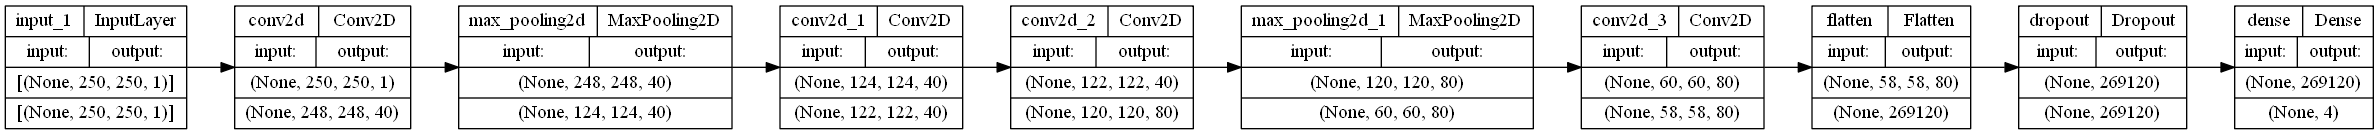

In [37]:
from tensorflow.keras.utils import plot_model
plot_model(model, show_shapes=True, rankdir='LR')

In [38]:
opt = Adam(learning_rate=0.0005)
model.compile(loss="categorical_crossentropy",
              optimizer=opt, metrics=["categorical_accuracy"])

## Train the model

In [39]:
history = model.fit(X_train, y_train, epochs=5, batch_size=32,
                    validation_data=(X_val, y_val), verbose=1)

Epoch 1/5
677/677 [==============================] - 383s 565ms/step - loss: 1.0622 - categorical_accuracy: 0.5700 - val_loss: 0.9513 - val_categorical_accuracy: 0.6109
Epoch 2/5
677/677 [==============================] - 342s 505ms/step - loss: 0.9988 - categorical_accuracy: 0.5904 - val_loss: 0.9588 - val_categorical_accuracy: 0.6176
Epoch 3/5
677/677 [==============================] - 342s 505ms/step - loss: 0.9629 - categorical_accuracy: 0.6052 - val_loss: 0.8962 - val_categorical_accuracy: 0.6280
Epoch 4/5
677/677 [==============================] - 341s 504ms/step - loss: 0.9382 - categorical_accuracy: 0.6151 - val_loss: 0.8894 - val_categorical_accuracy: 0.6339
Epoch 5/5
677/677 [==============================] - 342s 505ms/step - loss: 0.9200 - categorical_accuracy: 0.6277 - val_loss: 0.9128 - val_categorical_accuracy: 0.6309


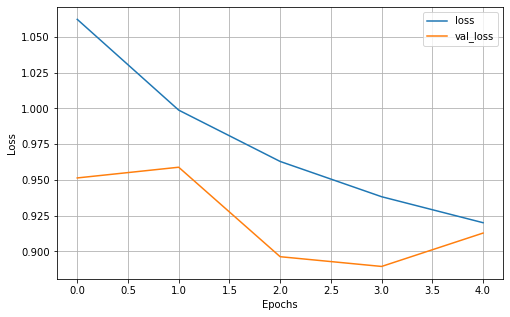

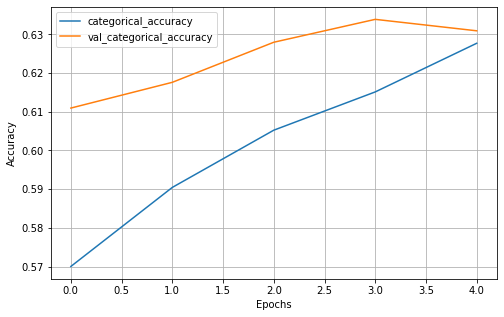

In [40]:
import pandas as pd
import matplotlib.pyplot as plt

pd.DataFrame(history.history)[['loss','val_loss']].plot(figsize=(8, 5))
plt.xlabel("Epochs"),plt.ylabel("Loss")
plt.grid(True)
plt.show()

pd.DataFrame(history.history)[['categorical_accuracy','val_categorical_accuracy']].plot(figsize=(8, 5))
plt.xlabel("Epochs"),plt.ylabel("Accuracy")
plt.grid(True)
plt.show()

In [42]:
# Save the model
model.save(path_output+'DeepLearningModel.h5')

In [43]:
# Save the history of the model
np.save(path_output+'history.npy', history.history)